# Ensembling predictions and generating submissions

Traditionally, let's load predictions of multiple models and create `SUBMISSIONS_PATH` if it does not exist:

In [1]:
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

# Where single model predictions are stored
PREDICTIONS_PATH = pathlib.Path("../predictions")

# Submissions and logits from ensembles will be stored
SUBMISSIONS_PATH = pathlib.Path("../submissions")
SUBMISSIONS_PATH.mkdir(parents=True, exist_ok=True)

# Ensembling predictions

Below ensembling method adds logits of all classifiers (multiplied by their validation score) and calculates `np.argmax` to make prediction.

Each predictions is timestamped and shows how many models were used to make a prediction.

Furthermore, logits are returned so we can analyze it further.

Threshold `0.85` was found to yield best results experimentally (and somewhat counterintuitive).

In [2]:
from utilities.predicting import ensemble_submission

logits = ensemble_submission(
    10000, 10, PREDICTIONS_PATH, SUBMISSIONS_PATH, threshold=0.85, weighted=True
)

predictions = np.argmax(logits, axis=1)
_, predictions_counts = np.unique(predictions, return_counts = True)

print(predictions_counts)

[1031  984 1000  999 1045 1003  921 1005 1010 1002]


In general, the more uniform predictions, the better might the submission be (as test set is probably uniformly distributed as well, don't do it next time please).

Though it's only a rough estimate, it helps in discounting most pointless submissions so one does not lose too many chances.

192


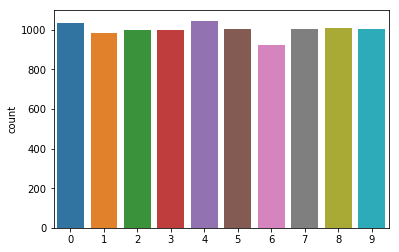

In [3]:
import seaborn as sns

sns.countplot(predictions)

print(f"Under/overpredicted: {np.sum(np.abs(predictions_counts - 1000))}")